<a href="https://colab.research.google.com/github/atul219/Track_Detect/blob/master/Track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# clone data from github
!git clone https://github.com/atul219/Track_Detect

Cloning into 'Track_Detect'...
remote: Enumerating objects: 12841, done.
remote: Counting objects: 100% (12841/12841), done.
remote: Compressing objects: 100% (12841/12841), done.
remote: Total 12841 (delta 0), reused 12841 (delta 0), pack-reused 0
Receiving objects: 100% (12841/12841), 161.56 MiB | 35.66 MiB/s, done.
Checking out files: 100% (12841/12841), done.


In [10]:
!ls Track_Detect

driving_log.csv  IMG


In [0]:
# libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D , Dropout, Flatten , Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split

In [39]:
data_dir = 'Track_Detect'
columns = ['center' ,'left' ,'right' ,'steering' ,'throttle' , 'reverse' ,'speed' ]
data = pd.read_csv(os.path.join(data_dir , 'driving_log.csv') , names = columns)
pd.set_option('display.max_colwidth' , -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_752.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_752.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_752.jpg,0.0,0.0,0.0,0.000078
1,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_855.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_855.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_855.jpg,0.0,0.0,0.0,0.000079
2,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_48_963.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_48_963.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_48_963.jpg,0.0,0.0,0.0,0.000078
3,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_49_066.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_49_066.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_49_066.jpg,0.0,0.0,0.0,0.000081
4,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\center_2019_02_07_01_24_49_168.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\left_2019_02_07_01_24_49_168.jpg,F:\Artificial_Intelligence\Machine_Learning\Machine learning Assignments\Computer_Vision\Self_Driving\Data\IMG\right_2019_02_07_01_24_49_168.jpg,0.0,0.0,0.0,0.000078


In [0]:
# to trim the extra section or path in the colum of cneter , left and right
def path_leaf(path):
  head , tail = ntpath.split(path)
  
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left']= data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [41]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_02_07_01_24_48_752.jpg,left_2019_02_07_01_24_48_752.jpg,right_2019_02_07_01_24_48_752.jpg,0.0,0.0,0.0,0.000078
1,center_2019_02_07_01_24_48_855.jpg,left_2019_02_07_01_24_48_855.jpg,right_2019_02_07_01_24_48_855.jpg,0.0,0.0,0.0,0.000079
2,center_2019_02_07_01_24_48_963.jpg,left_2019_02_07_01_24_48_963.jpg,right_2019_02_07_01_24_48_963.jpg,0.0,0.0,0.0,0.000078
3,center_2019_02_07_01_24_49_066.jpg,left_2019_02_07_01_24_49_066.jpg,right_2019_02_07_01_24_49_066.jpg,0.0,0.0,0.0,0.000081
4,center_2019_02_07_01_24_49_168.jpg,left_2019_02_07_01_24_49_168.jpg,right_2019_02_07_01_24_49_168.jpg,0.0,0.0,0.0,0.000078


<BarContainer object of 25 artists>

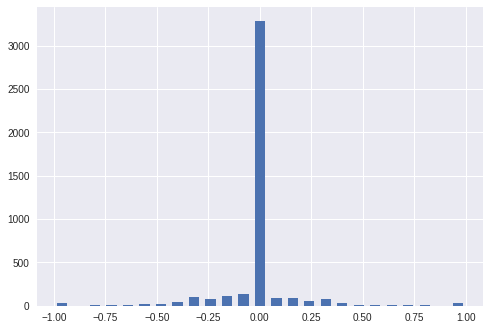

In [42]:
# plot steering angle for every image

# a) divide the bins
num_bins = 25
hist , bins = np.histogram(data['steering'] , num_bins)
# to center our data
center = (bins[:-1] + bins[1:]) * 0.5
#print(bins)
#print(center)
plt.bar(center , hist , width = 0.05)


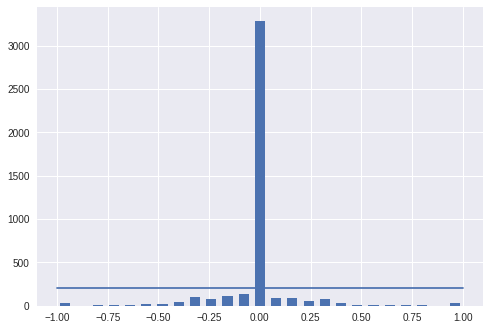

In [43]:
# this will make our network to be bias to drive at center so we will limit this a threshold
sample_per_bin = 200
plt.bar(center , hist , width = 0.05)
plt.plot((np.min(data['steering']) , np.max(data['steering'])), (sample_per_bin , sample_per_bin))

Total Data: 4280
Removed: 3083
Remaining Data: 1197


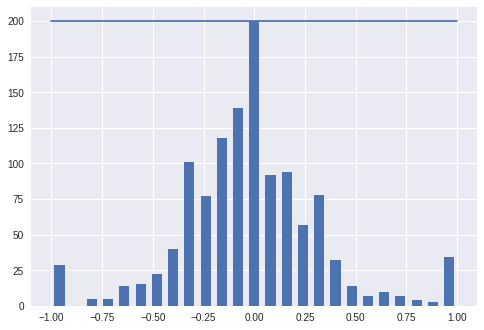

In [45]:
# to remove smaples
print("Total Data:" , len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[sample_per_bin:]
  remove_list.extend(list_)
    
    
print('Removed:' , len(remove_list))    
data.drop(data.index[remove_list] , inplace = True)
      
print("Remaining Data:" , len(data))
      
hist,_ = np.histogram(data['steering'] , (num_bins))
plt.bar(center , hist , width = 0.05)
plt.plot((np.min(data['steering']) , np.max(data['steering'])), (sample_per_bin , sample_per_bin))

In [52]:
print(data.iloc[1])
def load_img_steering(data_dir , df):
  img_path = []
  steering = []
  
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center , left , right = indexed_data[0] ,indexed_data[1] ,indexed_data[2]
    img_path.append(os.path.join(data_dir , center.strip()))
    steering.append(float(indexed_data[3]))
  
  img_path = np.asarray(img_path)
  steering = np.asarray(steering)
  
  return img_path , steering

img_path , steering = load_img_steering(data_dir + '/IMG' , data)

center      center_2019_02_07_01_24_49_066.jpg
left        left_2019_02_07_01_24_49_066.jpg  
right       right_2019_02_07_01_24_49_066.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       8.12126e-05                       
Name: 3, dtype: object


In [0]:
X_train, X_val ,y_train , y_val =  train_test_split(img_path , steering , test_size = 0.2 , random_state = 6)

Text(0.5, 1.0, 'Validation Set')

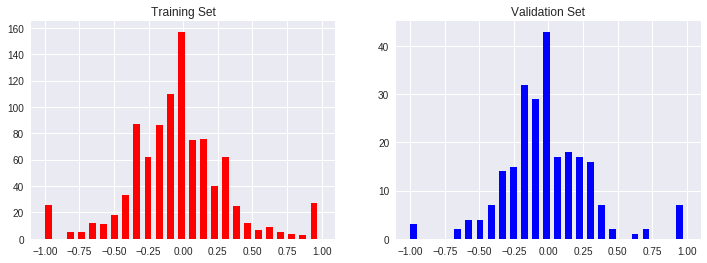

In [66]:
fig , axis = plt.subplots(1,2 , figsize = (12,4))
axis[0].hist(y_train , bins = num_bins , width = 0.05 , color = "red")
axis[0].set_title("Training Set")
axis[1].hist(y_val , bins = num_bins , width = 0.05 , color = "Blue")
axis[1].set_title("Validation Set")